In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### EDA

In [3]:
data=pd.read_csv('data/heart_2022_with_nans.csv',nrows=5000)
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [5]:
data.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [6]:
data.shape

(5000, 40)

In [7]:
data.size

200000

In [8]:
data.isna().sum()

State                           0
Sex                             0
GeneralHealth                  12
PhysicalHealthDays            146
MentalHealthDays              108
LastCheckupTime                79
PhysicalActivities              9
SleepHours                     89
RemovedTeeth                 1414
HadHeartAttack                 40
HadAngina                      52
HadStroke                      15
HadAsthma                      15
HadSkinCancer                  33
HadCOPD                        15
HadDepressiveDisorder          24
HadKidneyDisease               28
HadArthritis                   16
HadDiabetes                    10
DeafOrHardOfHearing           127
BlindOrVisionDifficulty       138
DifficultyConcentrating       164
DifficultyWalking             147
DifficultyDressingBathing     149
DifficultyErrands             157
SmokerStatus                  243
ECigaretteUsage               247
ChestScan                     481
RaceEthnicityCategory         105
AgeCategory   

In [9]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [10]:
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

### Outlier Handling 

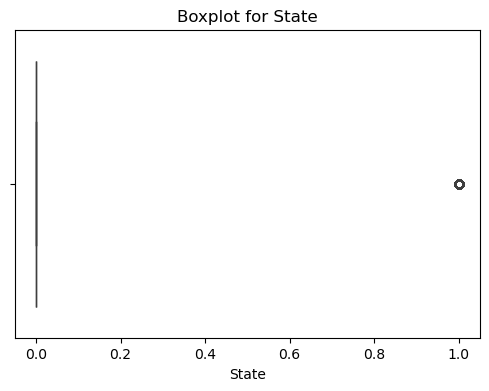

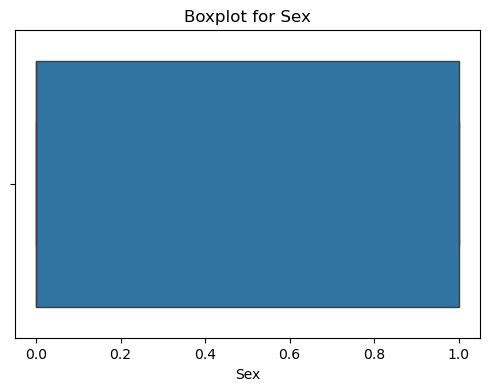

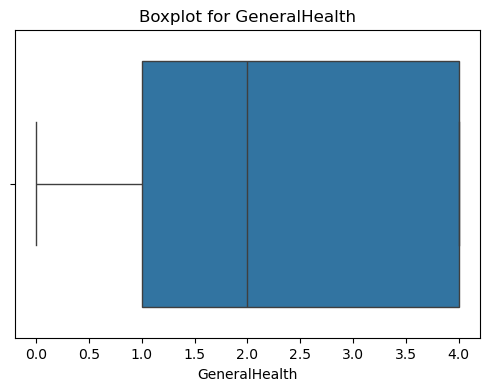

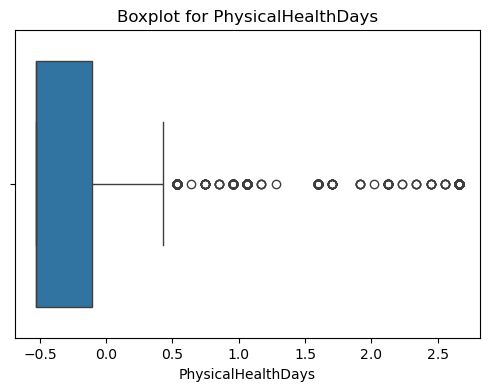

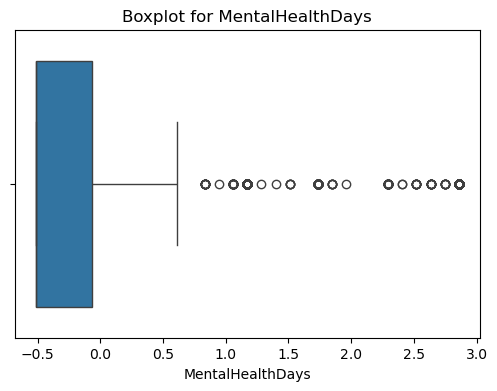

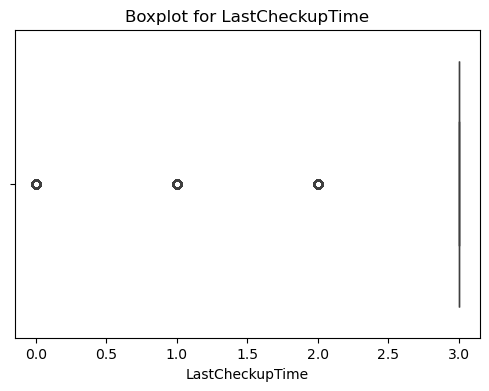

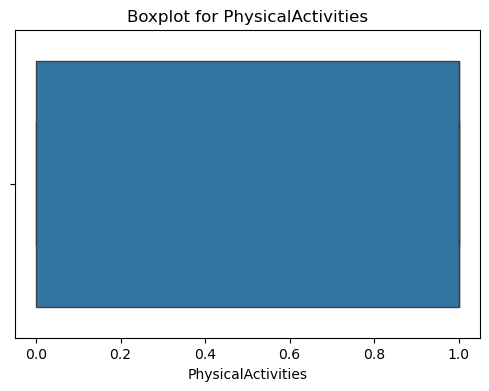

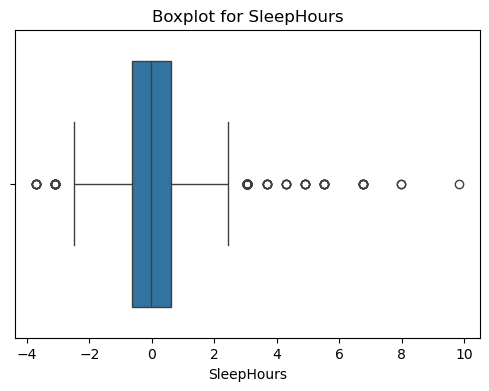

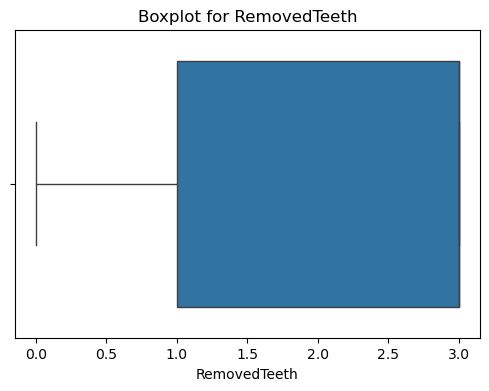

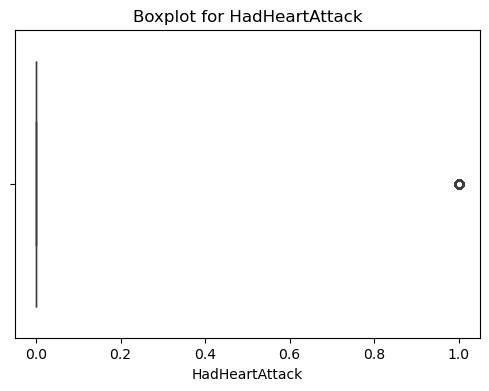

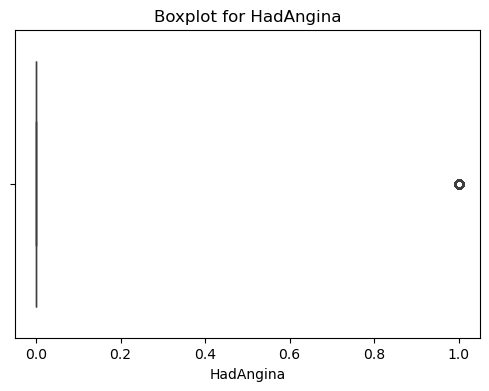

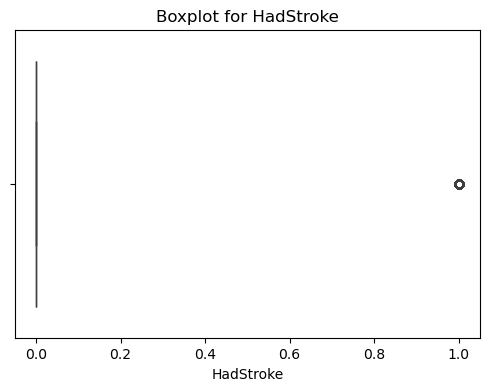

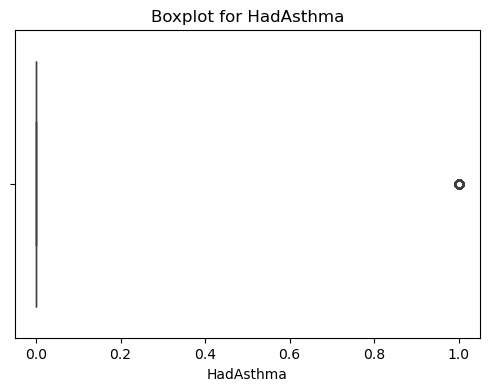

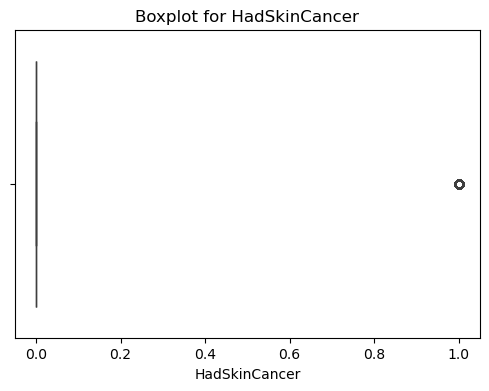

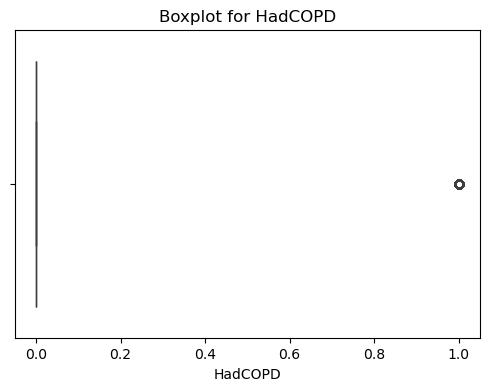

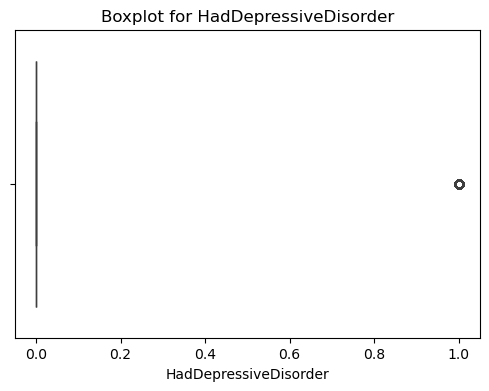

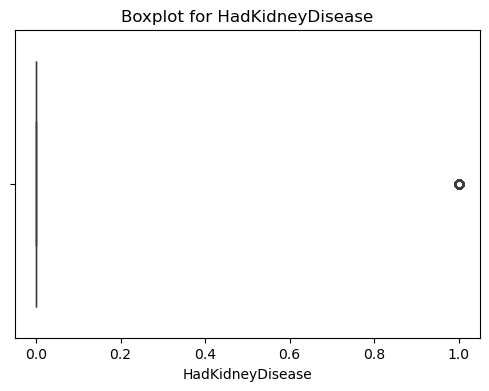

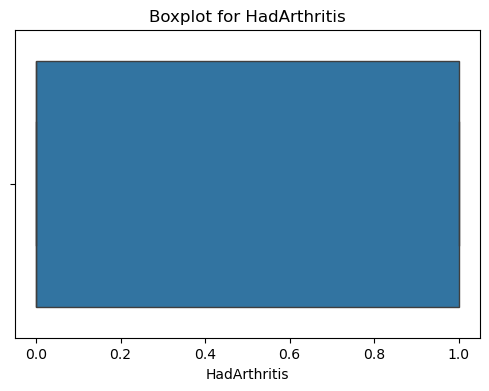

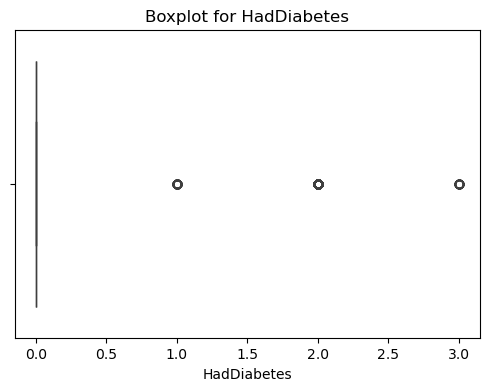

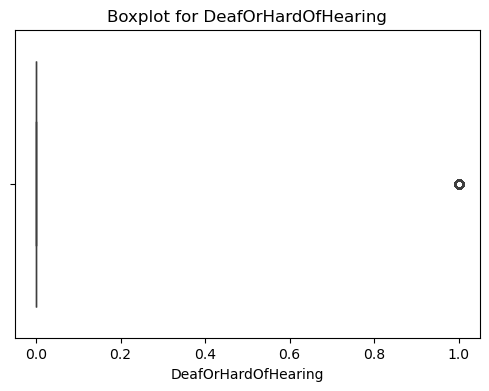

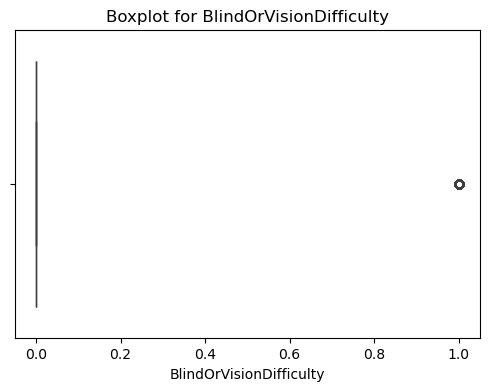

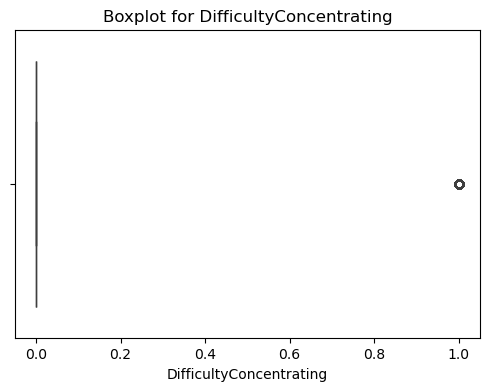

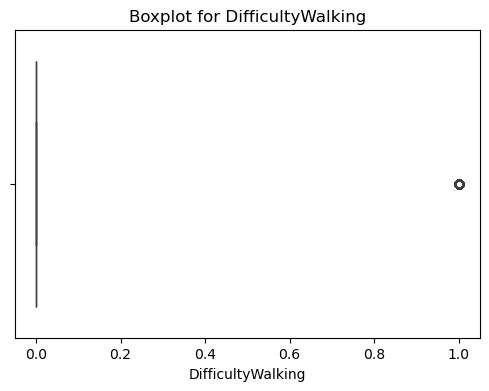

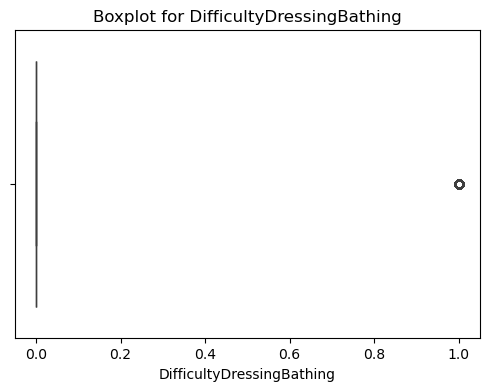

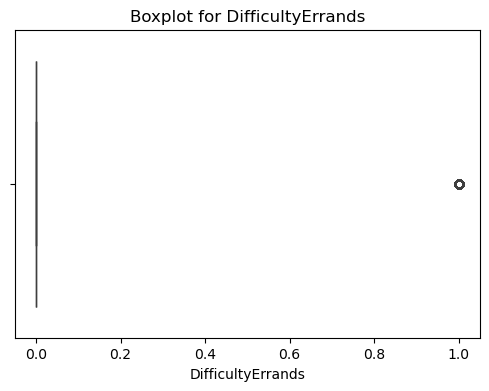

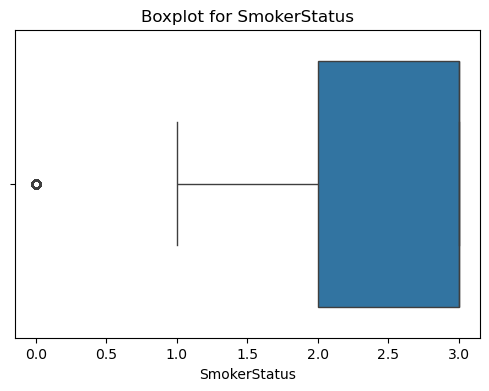

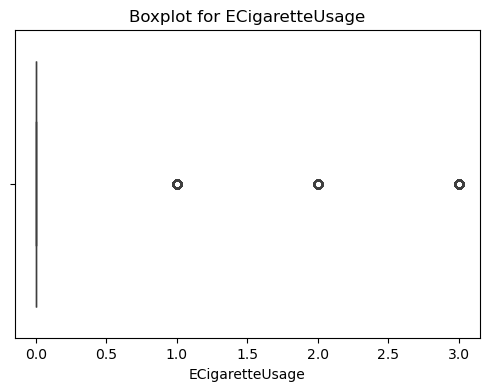

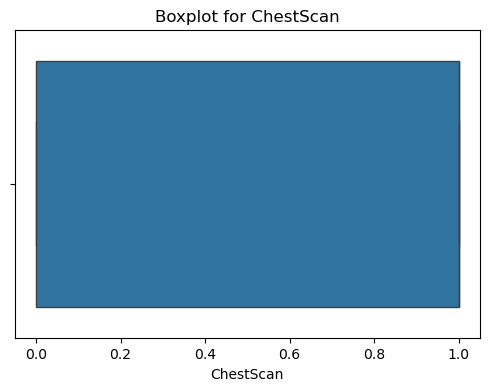

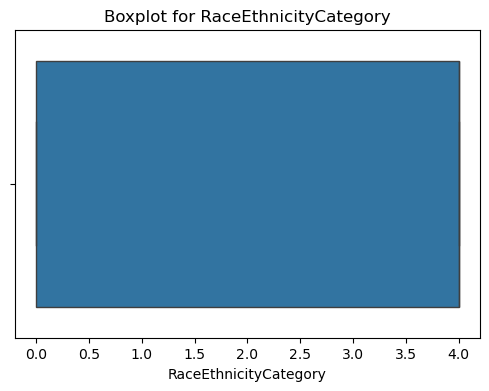

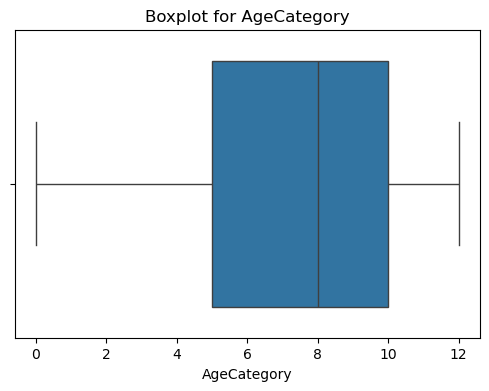

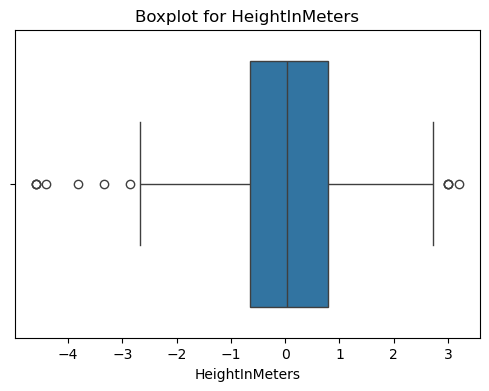

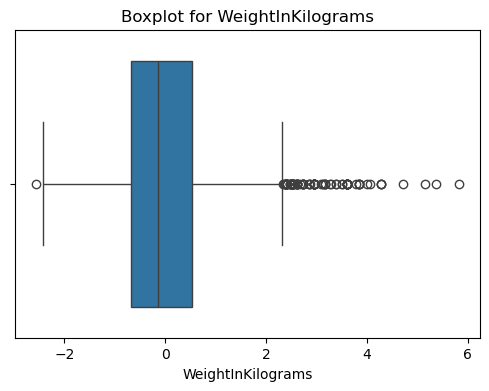

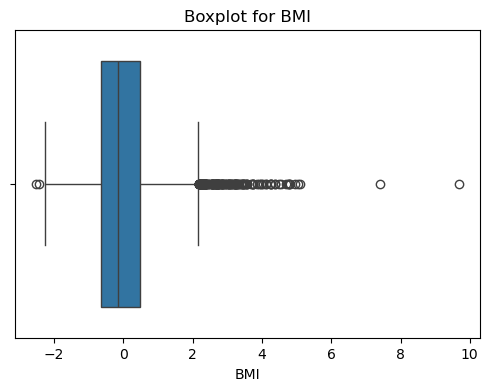

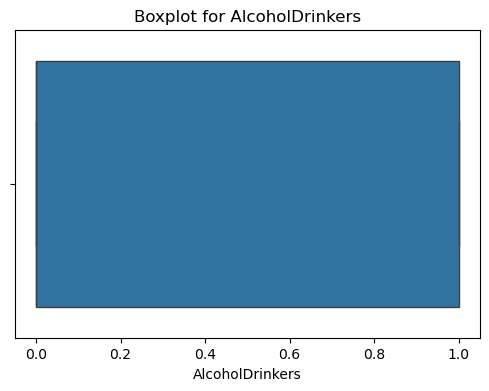

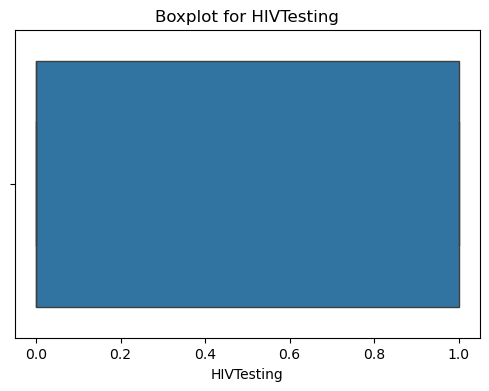

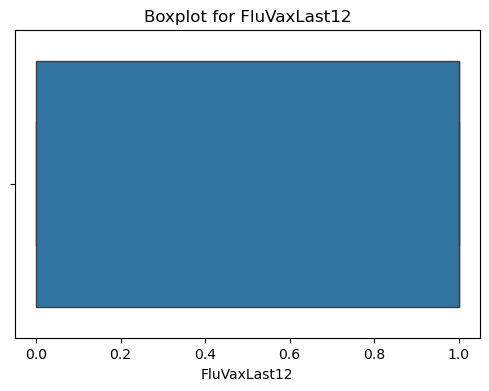

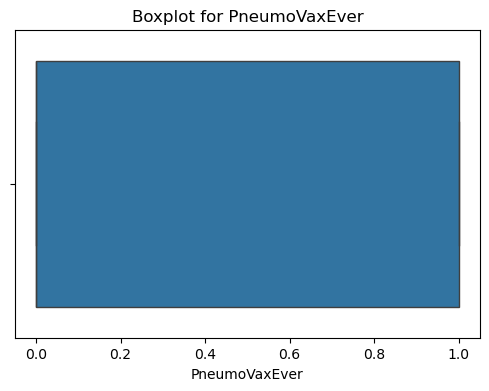

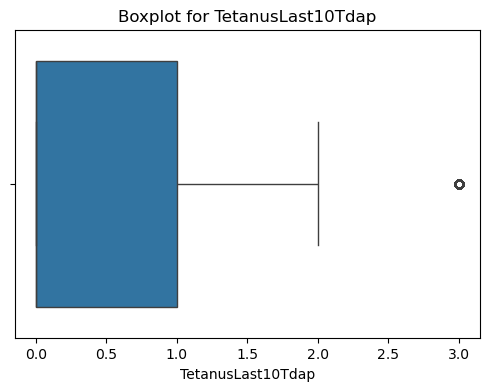

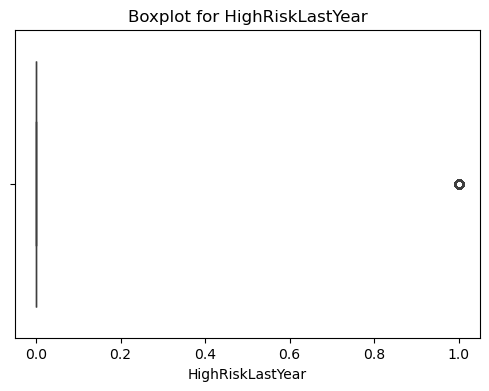

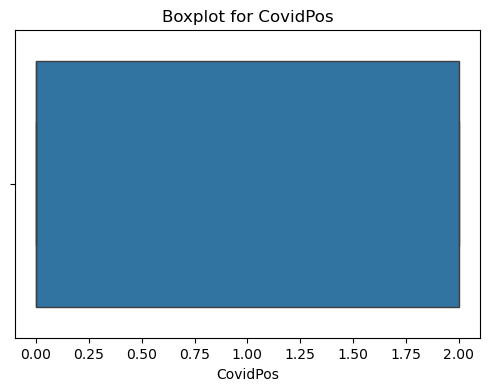

In [19]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [20]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      0    0              4           -0.529331         -0.513646   
1      0    0              0           -0.529331         -0.513646   
2      0    0              4           -0.316817         -0.176505   
3      0    0              0           -0.529331         -0.513646   
4      0    0              1           -0.316817         -0.513646   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                3                   0    0.596202             3   
1                3                   0   -0.634095             3   
2                3                   1   -1.249244             3   
3                3                   1   -0.018947             3   
4                3                   1    1.211351             3   

   HadHeartAttack  ...  HeightInMeters  WeightInKilograms       BMI  \
0               0  ...        0.025469          -0.136918 -0.148727   
1               0  ...      

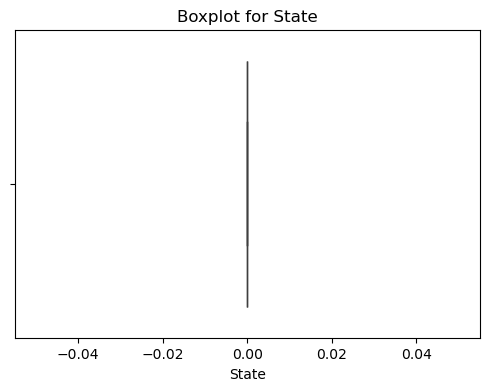

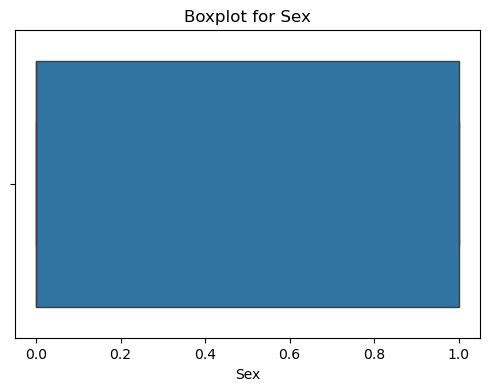

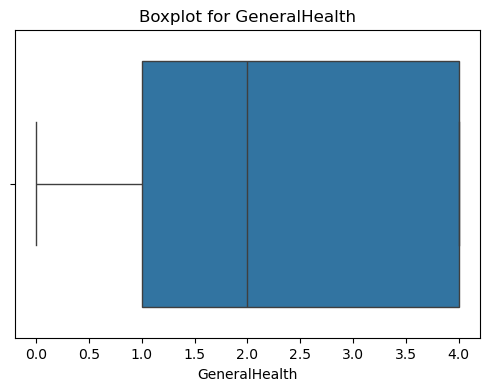

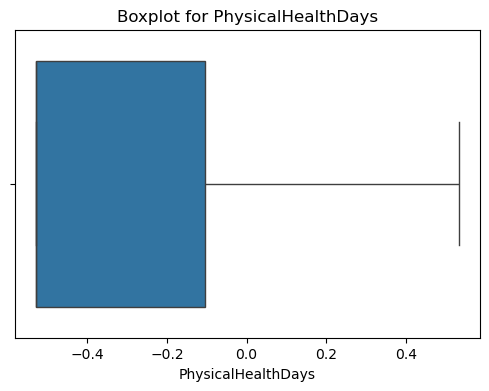

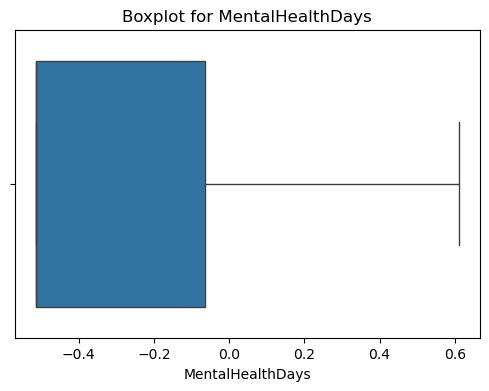

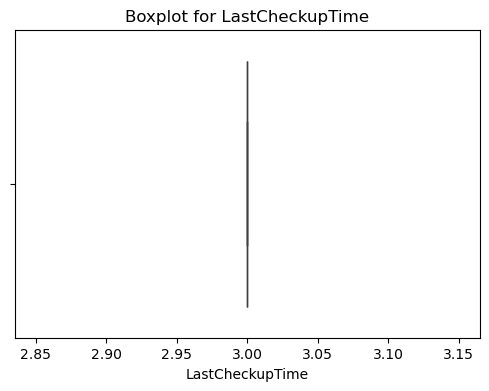

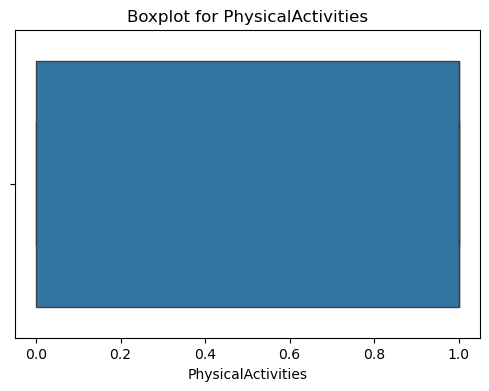

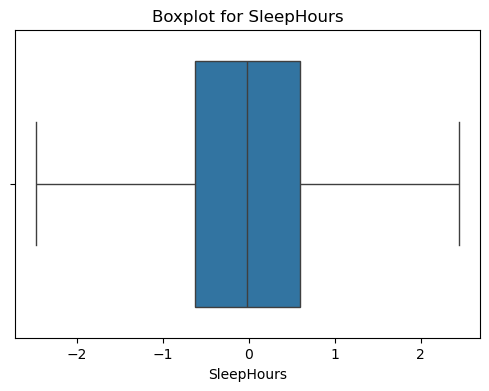

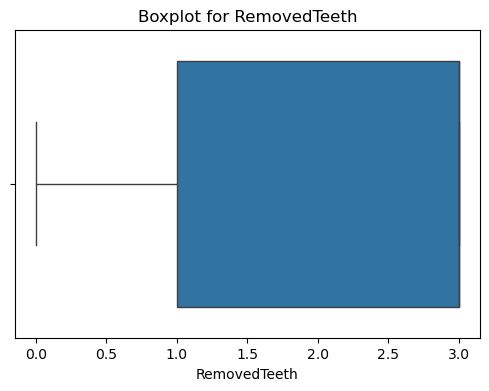

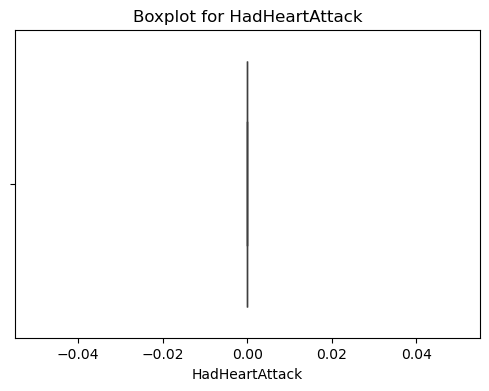

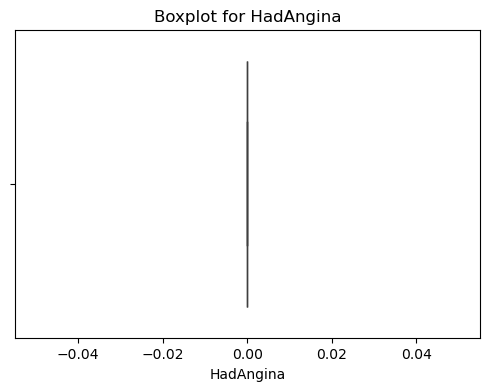

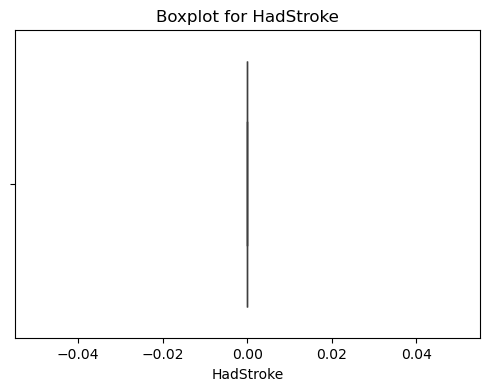

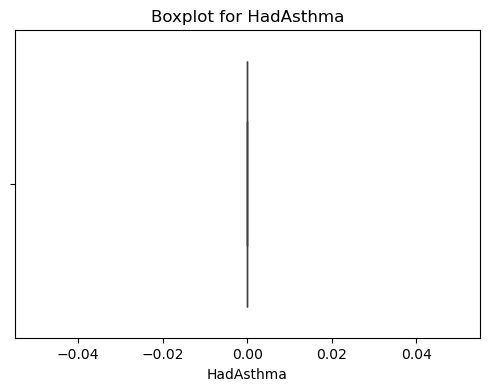

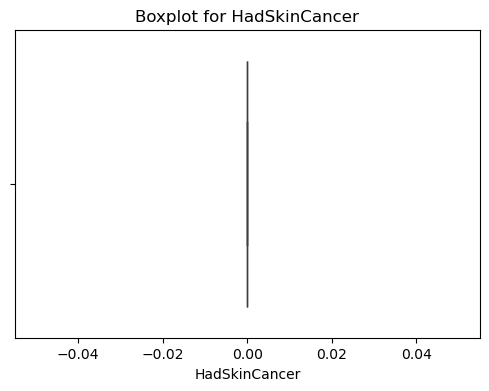

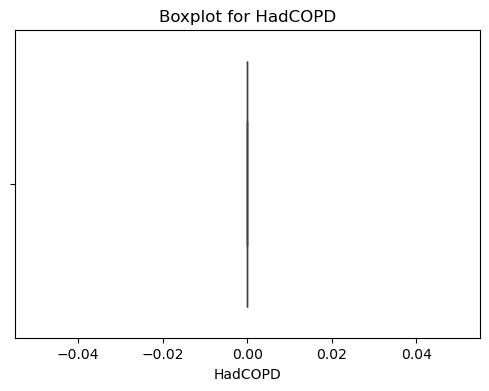

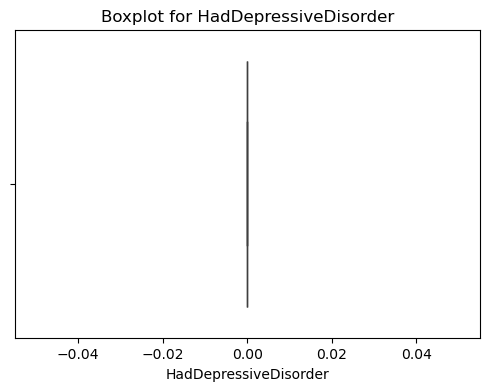

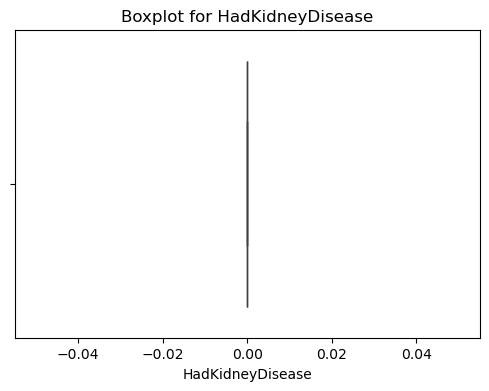

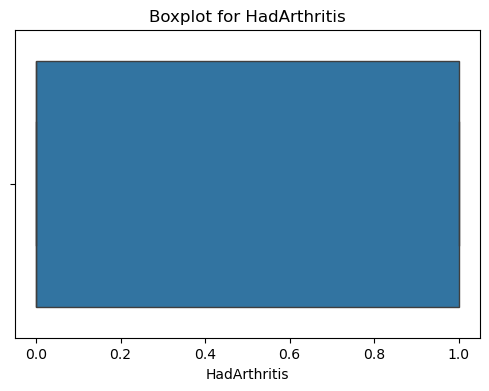

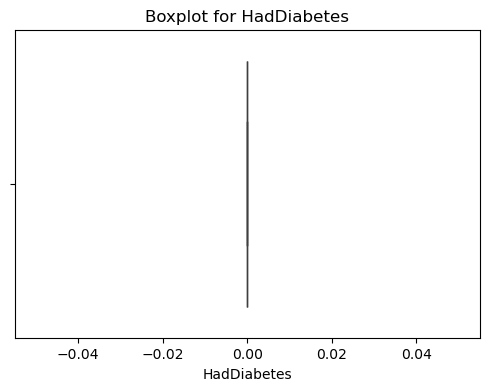

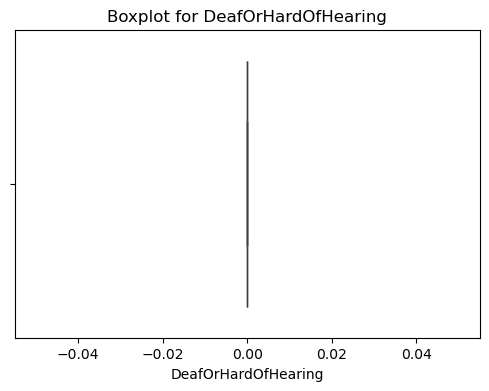

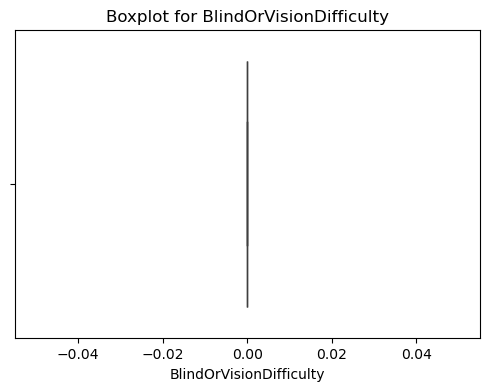

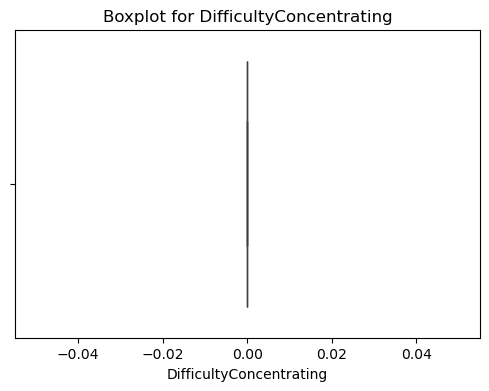

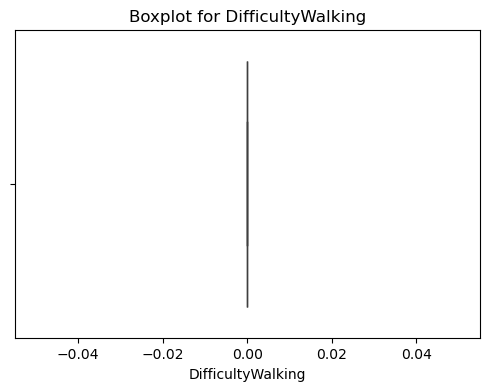

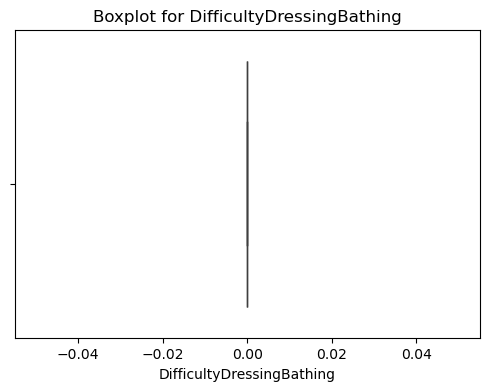

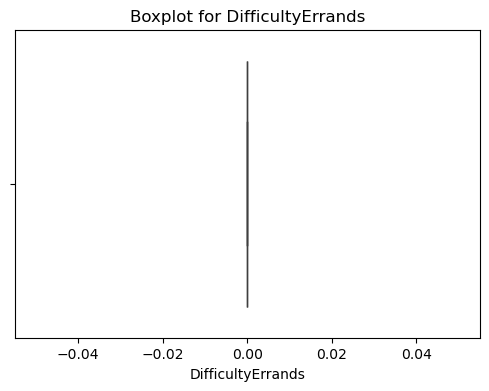

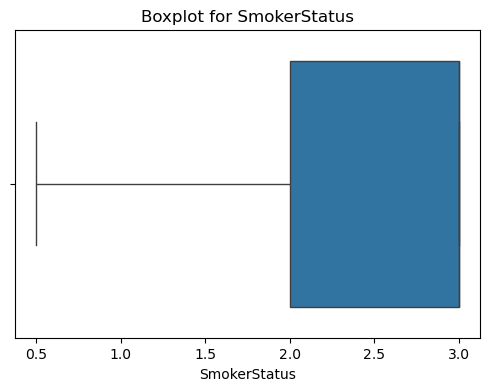

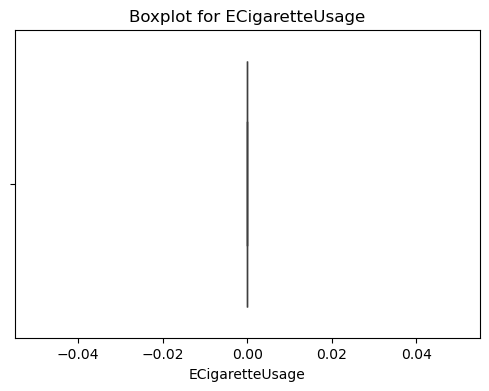

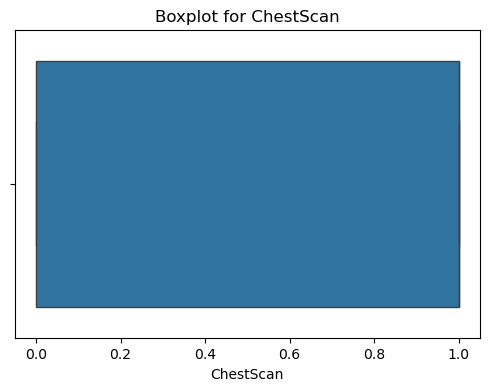

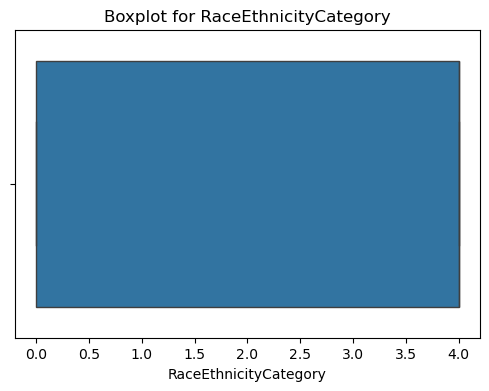

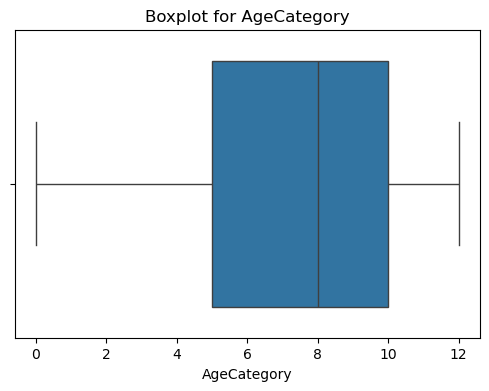

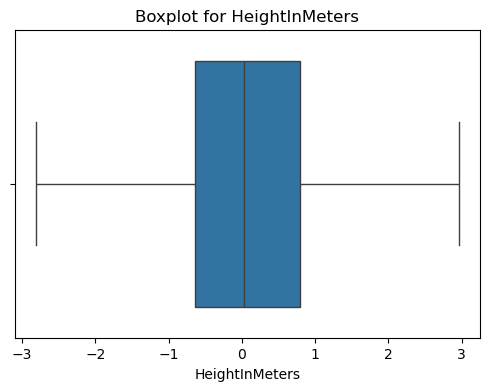

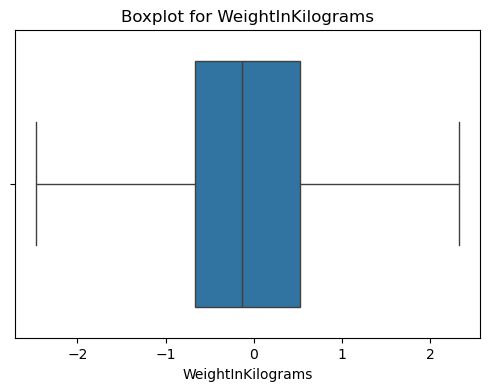

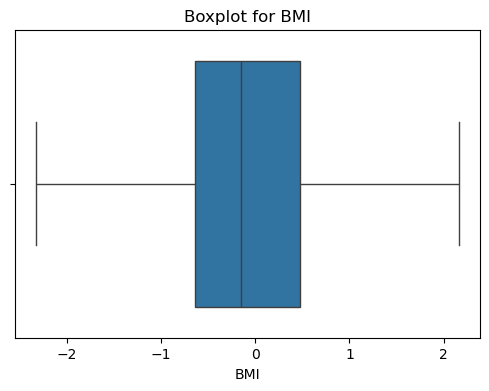

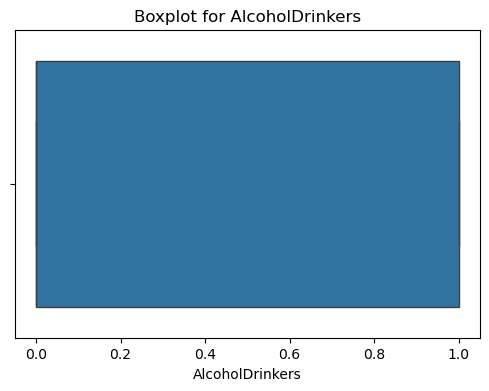

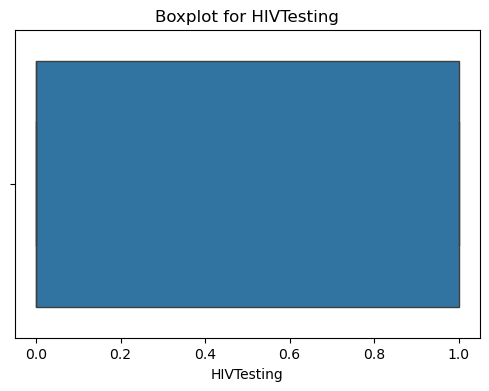

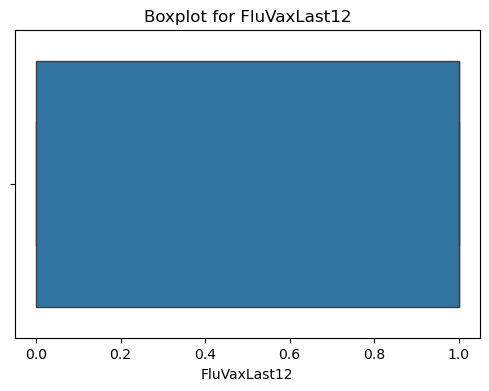

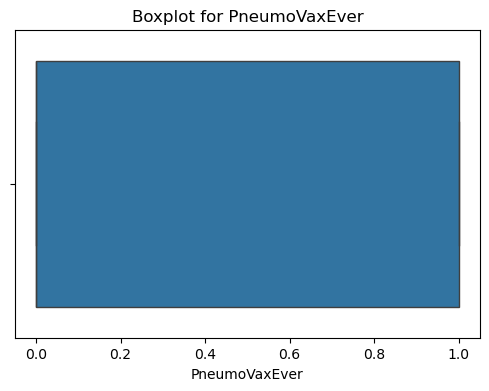

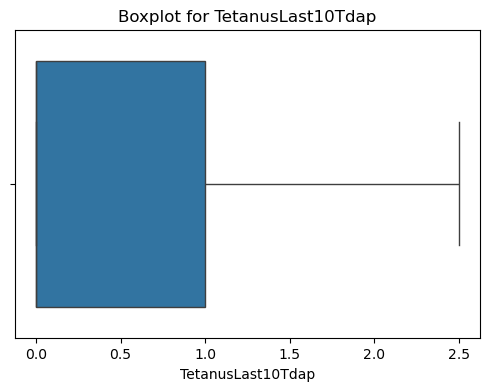

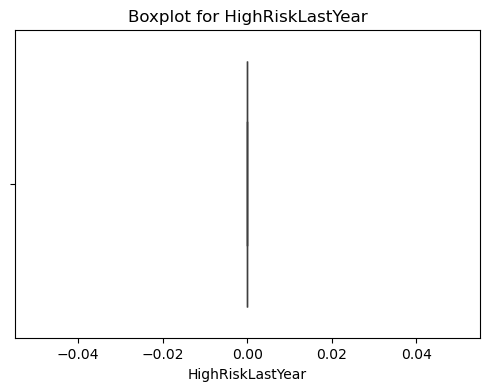

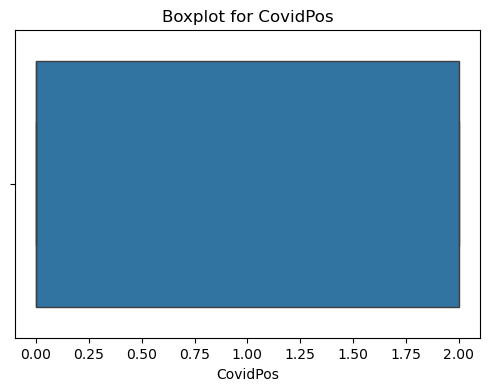

In [21]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [22]:
columns_to_drop = ['State', 'Sex', 'LastCheckupTime', 'CovidPos'] 
X = data.drop(columns=columns_to_drop, axis=1)
y = data['CovidPos'] 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])

[[-0.15557907 -0.64679801 -0.62874626  0.66323812  1.39965022  0.75898793
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.89226583  0.          0.          0.
   0.          0.          0.          0.          0.68117583  0.
   0.880574    0.65297016 -0.08752379  0.32387455 -0.92677855 -1.18371689
   1.26388393 -0.62631692  0.92110197 -0.78787407 -0.86820296  0.        ]
 [ 1.31041927 -0.64679801 -0.62874626 -1.5077541   0.69903692 -1.59021381
   0.          0.          0.          0.          0.          0.
   0.          0.          1.12074224  0.          0.          0.
   0.          0.          0.          0.          0.68117583  0.
  -1.1356229   0.65297016  1.06885991  0.81002669  0.803212    0.44031237
   1.26388393 -0.62631692  0.92110197 -0.78787407  1.41654168  0.        ]
 [-0.88857825  1.14435462 -0.62874626  0.66323812 -0.70218968 -1.59021381
   0.          0.          0.          0.          0.          0.
   0.          0. 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    'Random Forest Classifier' : RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)  
    y_pred = clf.predict(X_test_scaled)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 69.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       694
           1       0.00      0.00      0.00         9
           2       0.48      0.10      0.17       297

    accuracy                           0.69      1000
   macro avg       0.39      0.35      0.33      1000
weighted avg       0.63      0.69      0.61      1000

Logistic Regression Accuracy: 70.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       694
           1       0.00      0.00      0.00         9
           2       0.59      0.11      0.19       297

    accuracy                           0.70      1000
   macro avg       0.43      0.36      0.34      1000
weighted avg       0.67      0.70      0.62      1000

SVM Accuracy: 69.40%

Classification Report:
              precision    recall  f1-score   support

           

In [26]:
#END